In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

In [4]:
df = pd.read_csv('ObesityDataSet.csv')

## Summaty of dataset

In [5]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
cat_columns=df.select_dtypes('object')
for col in cat_columns:
    print(f"{col} : {list(df[col].unique())}")

Gender : ['Female', 'Male']
family_history_with_overweight : ['yes', 'no']
FAVC : ['no', 'yes']
CAEC : ['Sometimes', 'Frequently', 'Always', 'no']
SMOKE : ['no', 'yes']
SCC : ['no', 'yes']
CALC : ['no', 'Sometimes', 'Frequently', 'Always']
MTRANS : ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']
NObeyesdad : ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']


In [9]:
num_columns=df.select_dtypes('float64')
for col in num_columns:
    print(f"{col}")

Age
Height
Weight
FCVC
NCP
CH2O
FAF
TUE


In [10]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

## Visualisation of data

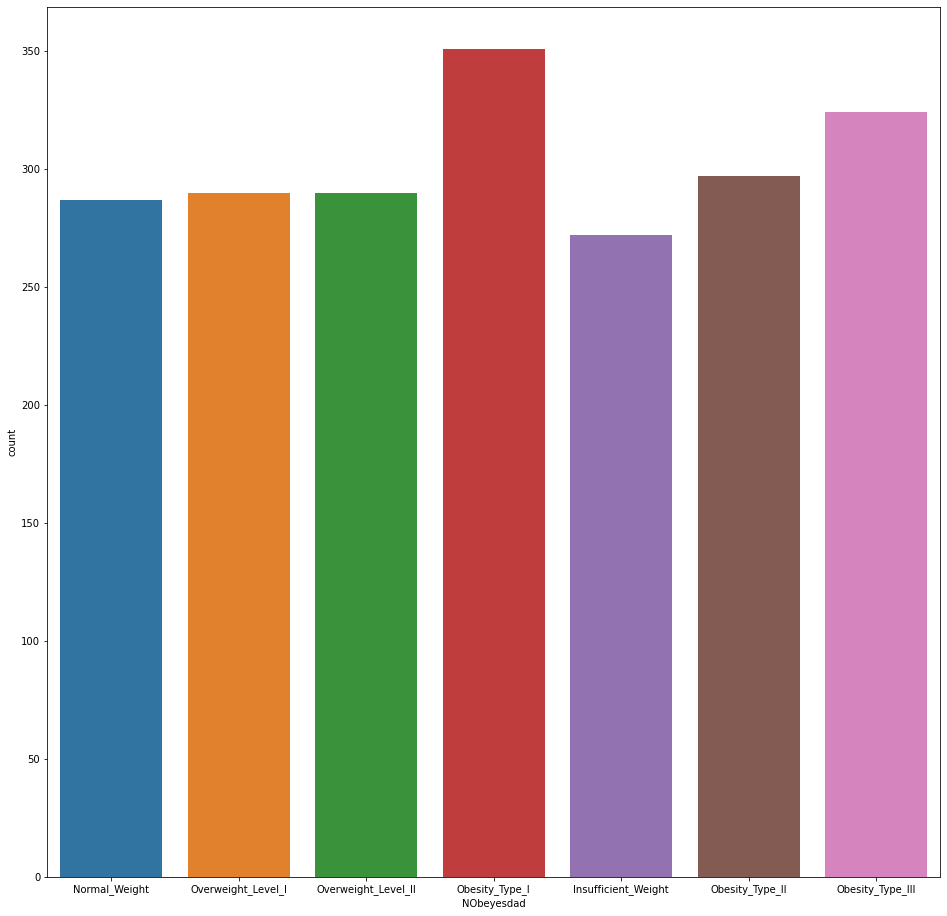

In [11]:
plt.figure(figsize=(16,16))
_ = sns.countplot(x='NObeyesdad', hue='NObeyesdad', data=df)

In [12]:
numerical_features = df.select_dtypes('float64').columns
categorical_features =  df.select_dtypes('object').columns.drop('NObeyesdad')

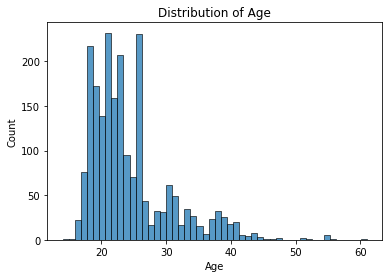

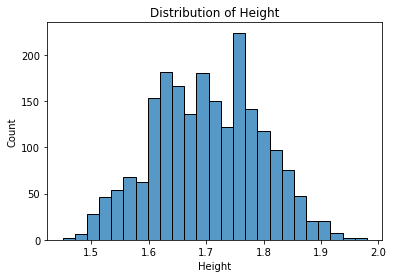

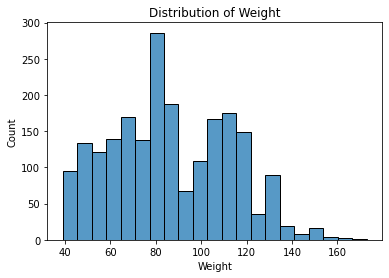

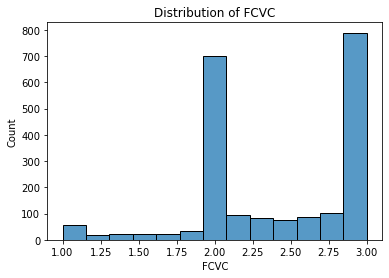

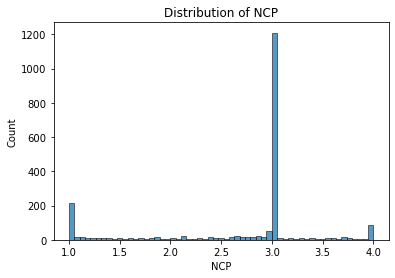

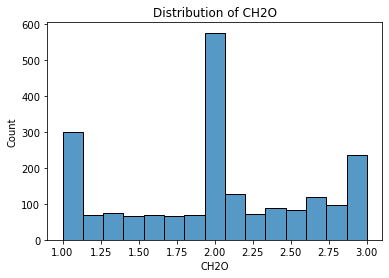

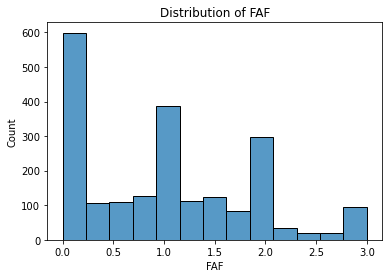

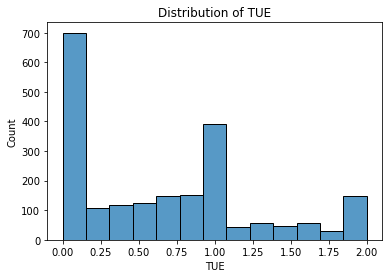

In [13]:
for column in numerical_features:
    sns.histplot(df, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()

## Preprocessing

In [14]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
def model_ready(df):
    bin_cat_columns=['family_history_with_overweight','FAVC','SMOKE','SCC','Gender']
    multi_cat_columns=['CAEC','CALC','MTRANS']
    
    for col in bin_cat_columns:
        df[col]=df[col].apply(lambda x: 1 if x=='yes' or 'Male' else 0)
    

    encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
    for col in multi_cat_columns:
        encoded_data = encoder.fit_transform(df[[col]])
        df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
        df.drop([col],axis=1,inplace=True)
        df=pd.concat([df,df_encoded],axis=1)
        
    return df

In [16]:
def map_Y(df):
    df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight':0,
                                             'Normal_Weight':1,
                                             'Overweight_Level_I':2,
                                             'Overweight_Level_II':3,
                                             'Obesity_Type_I':4,
                                             'Obesity_Type_II':5,
                                             'Obesity_Type_III':6}
                                            )
    
    return df['NObeyesdad']

In [17]:
final_df=model_ready(df)

y=map_Y(final_df[['NObeyesdad']].copy())

X=final_df.drop(columns=['NObeyesdad'],inplace=False)

### Train_test split

In [18]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

### LG

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42, stratify = y_dev)

In [21]:
lr = LogisticRegression(
    class_weight='balanced', 
    solver='liblinear'
)

# Initialise standard scaler
scaler = StandardScaler()

pipe_lr =  Pipeline([
    ('scaler', scaler),
    ('lr', lr)
])

param_grid = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'lr__penalty': ['l1', 'l2'] 
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(pipe_lr,       
                    param_grid, 
                    scoring = ['balanced_accuracy', 'f1_weighted'], 
                    refit = 'f1_weighted',  
                    cv = cv,
                    n_jobs = -1,
                    verbose = 2
                   )

grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'lr__penalty': ['l1', 'l2']},
             refit='f1_weighted', scoring=['balanced_accuracy', 'f1_weighted'],
             verbose=2)

In [22]:
print(grid.best_params_)
print(grid.best_score_)

{'lr__C': 100, 'lr__penalty': 'l1'}
0.6969067213102129


In [23]:
best_params = grid.best_params_
best_model = LogisticRegression(C = 100, penalty='l1', class_weight='balanced', solver='liblinear')
scaler = StandardScaler()

pipe_lr =  Pipeline([
    ('scaler', scaler),
    ('lr', best_model)
])
pipe_lr.fit(X_train, y_train)

train_f1_score = f1_score(y_dev, pipe_lr.predict(X_dev), average='weighted')
test_f1_score = f1_score(y_test, pipe_lr.predict(X_test), average='weighted')
print(f"train_f1_score: {round(train_f1_score, 4)}")
print(f"test_f1_score: {round(test_f1_score, 4)}")

train_f1_score: 0.7278
test_f1_score: 0.7107


### RF

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier(
    n_estimators = 100, 
    max_features='sqrt',
    class_weight='balanced', 
    random_state=42
    )
pipe_rfc =  Pipeline([
    ('rfc', rfc)
])


param_grid = {
    'rfc__max_depth': [8, 10, 12],
    'rfc__max_leaf_nodes': [50, 75],
    'rfc__min_samples_split': [50, 75, 100, 150, 200]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(pipe_rfc,       
                    param_grid,
                    scoring = ['balanced_accuracy', 'f1_weighted'], 
                    refit = 'f1_weighted',
                    cv = cv,
                    n_jobs = -1, 
                    verbose = 1
                   )

grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rfc',
                                        RandomForestClassifier(class_weight='balanced',
                                                               max_features='sqrt',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [8, 10, 12],
                         'rfc__max_leaf_nodes': [50, 75],
                         'rfc__min_samples_split': [50, 75, 100, 150, 200]},
             refit='f1_weighted', scoring=['balanced_accuracy', 'f1_weighted'],
             verbose=1)

In [26]:
print(grid.best_params_)
print(grid.best_score_)

{'rfc__max_depth': 12, 'rfc__max_leaf_nodes': 50, 'rfc__min_samples_split': 50}
0.832343676207391


In [27]:
best_params = grid.best_params_
best_model = RandomForestClassifier(
    n_estimators = 100,
    max_features='sqrt',
    max_depth= 12,
    max_leaf_nodes = 50,
    min_samples_split = 50,
    class_weight='balanced',
    random_state=42)

pipe_rf =  Pipeline([
    ('rf', best_model)
])
pipe_rf.fit(X_train, y_train)

train_f1_score = f1_score(y_dev, pipe_rf.predict(X_dev), average='weighted')
test_f1_score = f1_score(y_test, pipe_rf.predict(X_test), average='weighted')
print(f"train_f1_score: {round(train_f1_score, 4)}")
print(f"test_f1_score: {round(test_f1_score, 4)}")

train_f1_score: 0.9059
test_f1_score: 0.8695


### XGBoost

In [28]:
from xgboost import XGBClassifier

In [29]:
param_grid = {
    'xgb__learning_rate': [0.01, 0.1],  
    'xgb__max_depth': [3, 5, 7],  
    'xgb__reg_alpha': [0.1, 0.5, 1] 
}

xgb = XGBClassifier(booster='gbtree', random_state=42) 

pipe_rfc =  Pipeline([
    ('xgb', xgb)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = RandomizedSearchCV(pipe_rfc,       
                    param_grid,
                    scoring = ['balanced_accuracy', 'f1_weighted'], 
                    refit = 'f1_weighted',  
                    cv = cv,
                    n_jobs = -1,
                    n_iter = 500
                   )

grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster='gbtree',
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                           

In [30]:
print(grid.best_params_)
print(grid.best_score_)

{'xgb__reg_alpha': 0.1, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1}
0.9532832369410562


In [31]:
best_params = grid.best_params_
best_model = XGBClassifier(reg_alpha=0.1, max_depth=5, learning_rate=0.1, booster='gbtree', random_state=42)

pipe_xgb =  Pipeline([
    ('xgb', best_model)
])
pipe_xgb.fit(X_train, y_train)

train_f1_score = f1_score(y_dev, pipe_xgb.predict(X_dev), average='weighted')
test_f1_score = f1_score(y_test, pipe_xgb.predict(X_test), average='weighted')
print(f"train_f1_score: {round(train_f1_score, 4)}")
print(f"test_f1_score: {round(test_f1_score, 4)}")

train_f1_score: 0.9924
test_f1_score: 0.9356


## Exp. 2

In [32]:
X = X.drop(columns = ['Height', 'Weight'])

In [33]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42, stratify = y_dev)

In [35]:
lr = LogisticRegression(
    class_weight='balanced', 
    solver='liblinear'
)


scaler = StandardScaler()

pipe_lr =  Pipeline([
    ('scaler', scaler),
    ('lr', lr)
])


param_grid = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'lr__penalty': ['l1', 'l2']  
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)


grid = GridSearchCV(pipe_lr,       
                    param_grid, 
                    scoring = ['balanced_accuracy', 'f1_weighted'], 
                    refit = 'f1_weighted',  
                    cv = cv,
                    n_jobs = -1,
                    verbose = 2
                   )

grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'lr__penalty': ['l1', 'l2']},
             refit='f1_weighted', scoring=['balanced_accuracy', 'f1_weighted'],
             verbose=2)

In [36]:
print(grid.best_params_)
print(grid.best_score_)

{'lr__C': 100, 'lr__penalty': 'l1'}
0.49137759095998057


In [37]:
best_params = grid.best_params_
best_model = LogisticRegression(C = 100, penalty='l1', class_weight='balanced', solver='liblinear')
scaler = StandardScaler()

pipe_lr =  Pipeline([
    ('scaler', scaler),
    ('lr', best_model)
])
pipe_lr.fit(X_train, y_train)

train_f1_score = f1_score(y_dev, pipe_lr.predict(X_dev), average='weighted')
test_f1_score = f1_score(y_test, pipe_lr.predict(X_test), average='weighted')
print(f"train_f1_score: {round(train_f1_score, 4)}")
print(f"test_f1_score: {round(test_f1_score, 4)}")

train_f1_score: 0.5205
test_f1_score: 0.5013


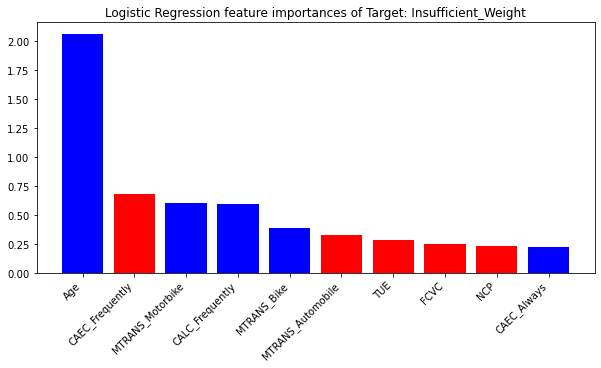

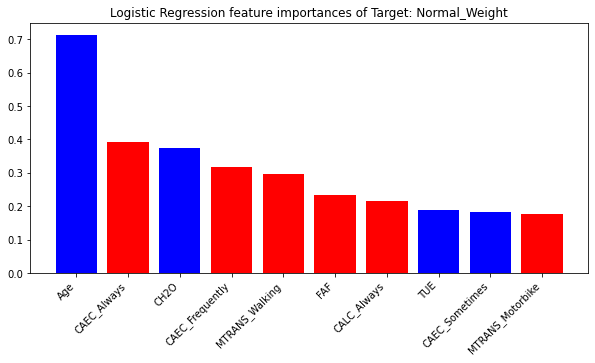

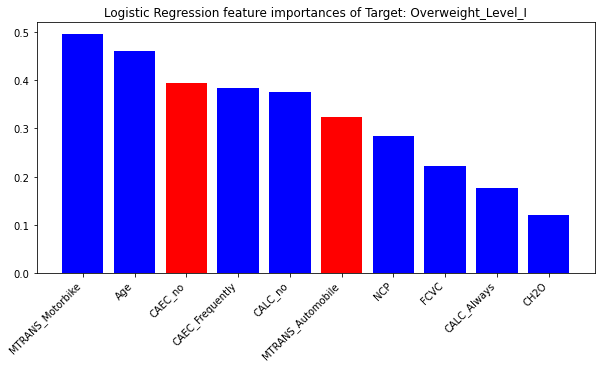

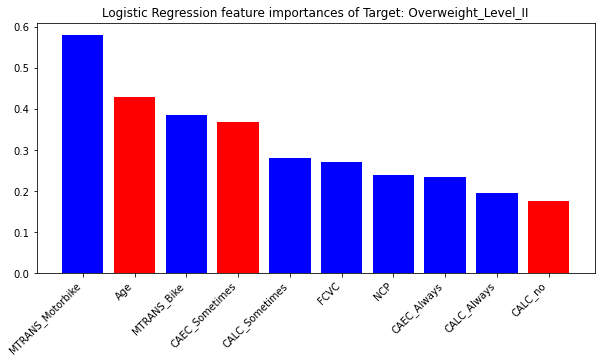

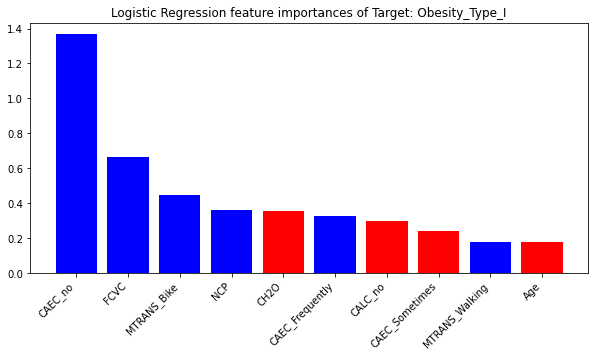

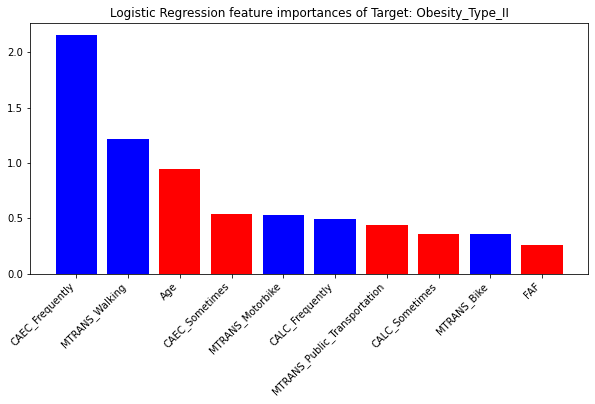

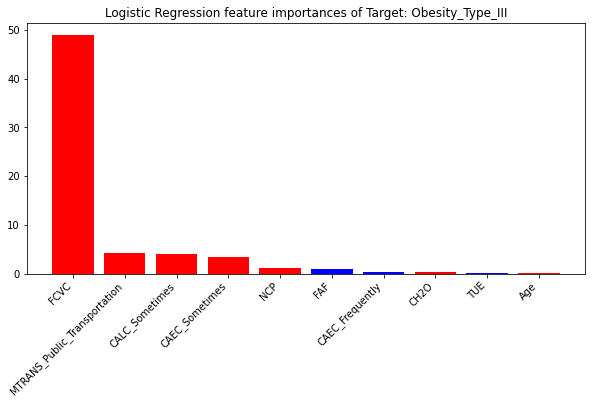

In [38]:
class_labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I',
               'Obesity_Type_II', 'Obesity_Type_III']
for target_label in range(7): 
    lr_feature_importance = pd.DataFrame({'feature': X_dev.columns,
                                          'coeff': best_model.coef_[target_label], 'abs(coeff)': np.abs(best_model.coef_[target_label])})
    lr_feature_importance.sort_values('abs(coeff)', ascending=False)

    coefs = lr_feature_importance['coeff'].values
    color = np.array(['red' if c > 0 else 'blue' for c in coefs])
    coefs = np.abs(coefs)
    indices = np.argsort(coefs)[::-1]

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    plt.title(f"Logistic Regression feature importances of Target: {class_labels[target_label]}")
    plt.bar(range(10), coefs[indices[:10]], color=color[indices[:10]], align='center')
    plt.xticks(range(10), X_dev.columns[indices[:10]], rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.3)
    plt.show()

In [39]:
rfc = RandomForestClassifier(
    n_estimators = 100,  
    max_features='sqrt',
    class_weight='balanced', 
    random_state=42)

pipe_rfc =  Pipeline([
    ('rfc', rfc)
])


param_grid = {
    'rfc__max_depth': [8, 10, 12],
    'rfc__max_leaf_nodes': [50, 75],
    'rfc__min_samples_split': [50, 75, 100, 150, 200]
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(pipe_rfc,       
                    param_grid, 
                    scoring = ['balanced_accuracy', 'f1_weighted'], 
                    refit = 'f1_weighted', 
                    cv = cv,
                    n_jobs = -1, 
                    verbose = 1
                   )

grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rfc',
                                        RandomForestClassifier(class_weight='balanced',
                                                               max_features='sqrt',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [8, 10, 12],
                         'rfc__max_leaf_nodes': [50, 75],
                         'rfc__min_samples_split': [50, 75, 100, 150, 200]},
             refit='f1_weighted', scoring=['balanced_accuracy', 'f1_weighted'],
             verbose=1)

In [40]:
print(grid.best_params_)
print(grid.best_score_)

{'rfc__max_depth': 12, 'rfc__max_leaf_nodes': 50, 'rfc__min_samples_split': 50}
0.6574010339001028


In [41]:
best_params = grid.best_params_
best_model = RandomForestClassifier(
    n_estimators = 100,
    max_features='sqrt',
    max_depth= 10,
    max_leaf_nodes = 50,
    min_samples_split = 50,
    class_weight='balanced',
    random_state=42)

pipe_rf =  Pipeline([
    ('rf', best_model)
])
pipe_rf.fit(X_train, y_train)

train_f1_score = f1_score(y_dev, pipe_rf.predict(X_dev), average='weighted')
test_f1_score = f1_score(y_test, pipe_rf.predict(X_test), average='weighted')
print(f"train_f1_score: {round(train_f1_score, 4)}")
print(f"test_f1_score: {round(test_f1_score, 4)}")

train_f1_score: 0.7177
test_f1_score: 0.6548


In [44]:
param_grid = {
    'xgb__learning_rate': [0.01, 0.1],  
    'xgb__max_depth': [3, 5, 7],  
    'xgb__reg_alpha': [0.1, 0.5, 1]  
}

xgb = XGBClassifier(booster='gbtree', random_state=42)   
pipe_rfc =  Pipeline([
    ('xgb', xgb)
])


cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

grid = RandomizedSearchCV(pipe_rfc,       
                    param_grid, 
                    scoring = ['balanced_accuracy', 'f1_weighted'], 
                    refit = 'f1_weighted', 
                    cv = cv,
                    n_jobs = -1,
                    n_iter = 500
                   )

grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster='gbtree',
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                           

In [45]:
print(grid.best_params_)
print(grid.best_score_)

{'xgb__reg_alpha': 0.1, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.1}
0.7627494229597974


In [46]:
best_params = grid.best_params_
best_model = XGBClassifier(reg_alpha=0.5, max_depth=7, learning_rate=0.1, booster='gbtree', random_state=42)


best_model.fit(X_train, y_train)

train_f1_score = f1_score(y_dev, best_model.predict(X_dev), average='weighted')
test_f1_score = f1_score(y_test, best_model.predict(X_test), average='weighted')
print(f"train_f1_score: {round(train_f1_score, 4)}")
print(f"test_f1_score: {round(test_f1_score, 4)}")

train_f1_score: 0.9476
test_f1_score: 0.7834


In [47]:
from shap import TreeExplainer, summary_plot, plots

In [48]:
X_importance = X_test

explainer = TreeExplainer(best_model)
shap_values = explainer.shap_values(X_importance)

In [49]:
shap_values.shape

(528, 24, 7)

SHAP Values of Target: <Insufficient_Weight>


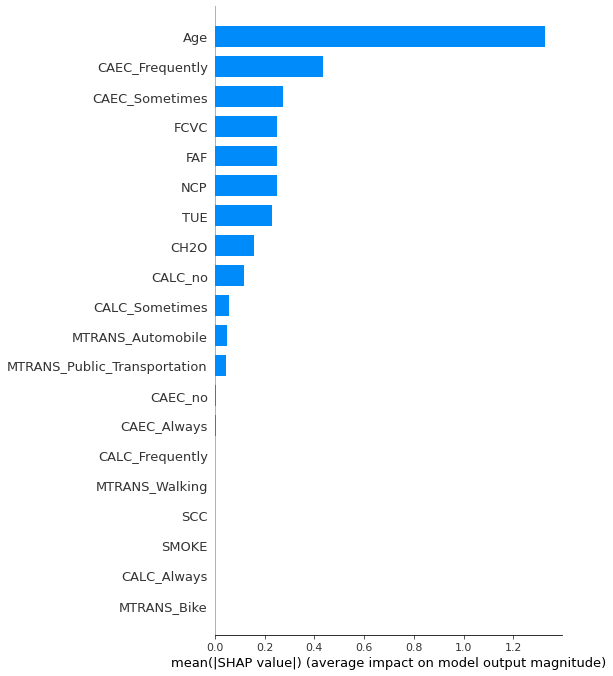

 
SHAP Values of Target: <Normal_Weight>


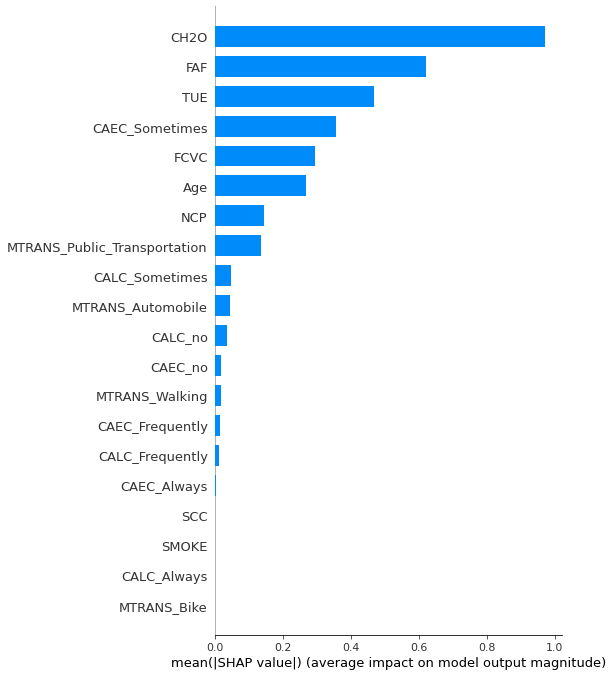

 
SHAP Values of Target: <Overweight_Level_I>


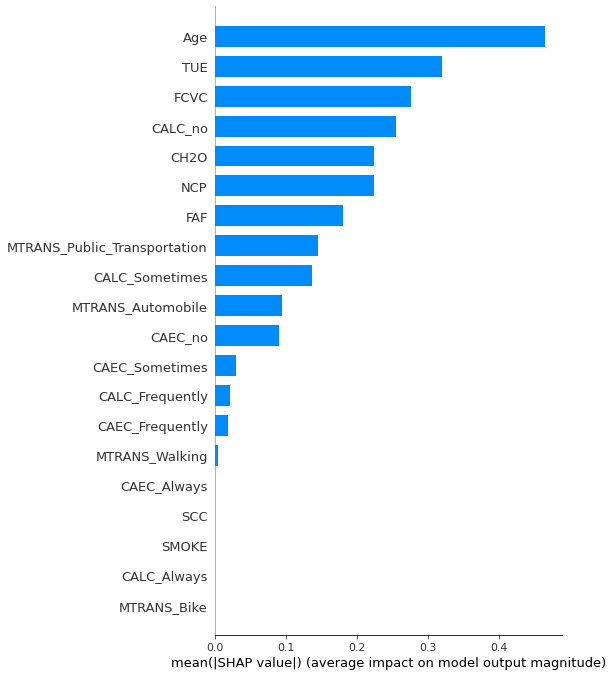

 
SHAP Values of Target: <Overweight_Level_II>


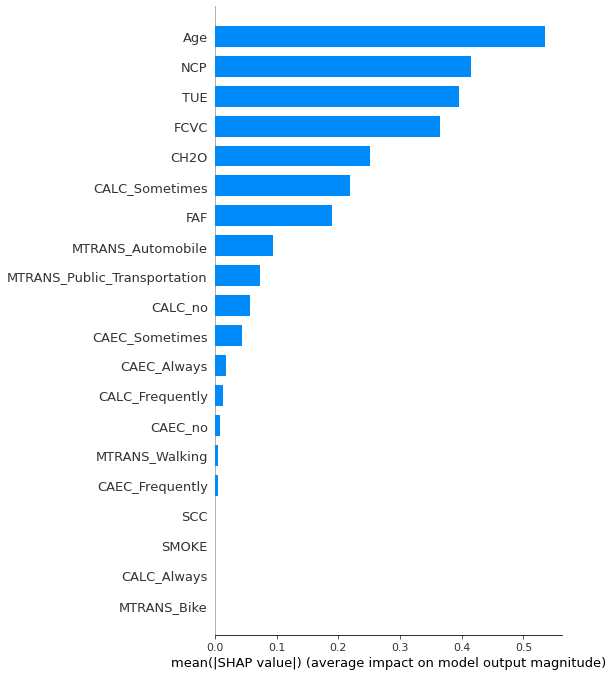

 
SHAP Values of Target: <Obesity_Type_I>


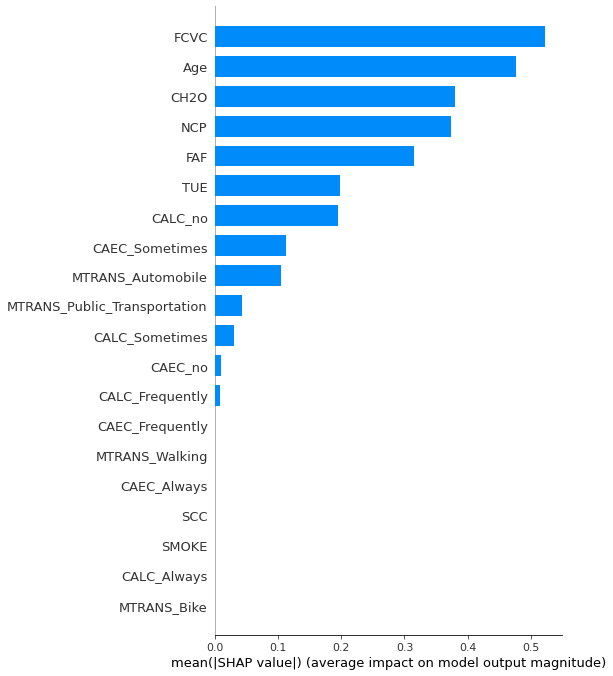

 
SHAP Values of Target: <Obesity_Type_II>


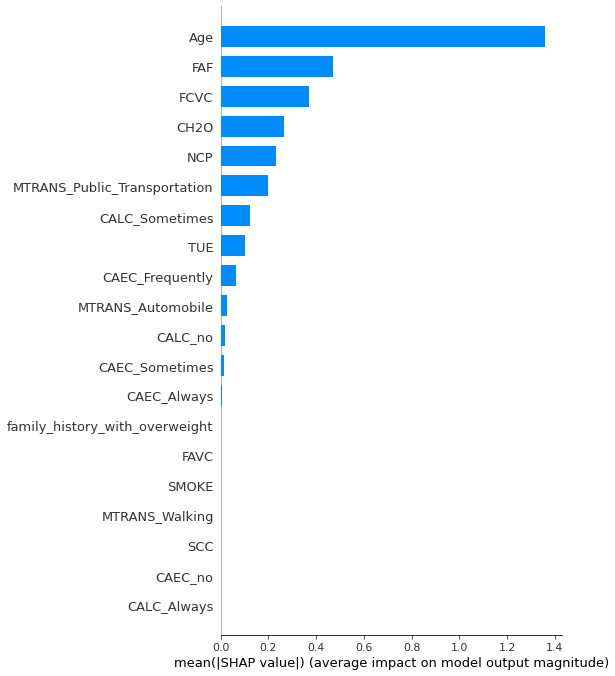

 
SHAP Values of Target: <Obesity_Type_III>


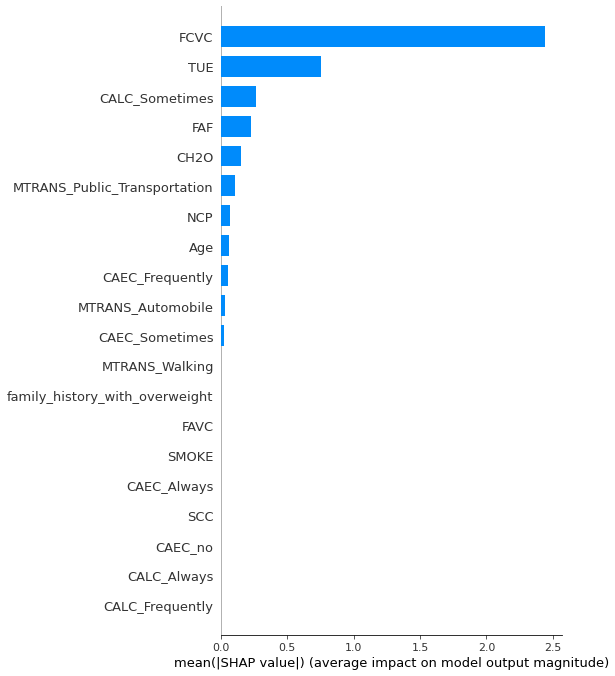

In [50]:
class_labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I',
               'Obesity_Type_II', 'Obesity_Type_III']
for target_label in range(7):
    print(f"SHAP Values of Target: <{class_labels[target_label]}>")
    summary_plot(shap_values[:,:,target_label], X_test, plot_type='bar')
    print(' ')